In [12]:
import pandas as pd
import geopandas as gpd
import shapely

from sodapy import Socrata

In [35]:
lines_gdf = gpd.read_file('data\Subway Lines.zip')
boroughs = gpd.read_file('data\Borough Boundaries.zip')

stations = pd.read_csv('data\MTA_Subway_Stations_20240214.csv')
stations_gdf = gpd.GeoDataFrame(data=stations, 
                       geometry=stations['Georeference']
                       .apply(shapely.wkt.loads))


In [10]:
delays = pd.read_csv('data\MTA_Subway_Trains_Delayed__Beginning_2020_20240214.csv')
delays

,month,division,line,day_type,reporting_category,subcategory,delays
0,2023-12,A DIVISION,1,1,Crew Availability,Crew Availability,221
1,2023-12,A DIVISION,1,1,External Factors,External Agency or Utility,13
2,2023-12,A DIVISION,1,1,External Factors,External Debris on Roadbed,113
3,2023-12,A DIVISION,1,1,Infrastructure & Equipment,Braking,24
4,2023-12,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,39
...,...,...,...,...,...,...,...
32558,2020-01,Systemwide,Systemwide,2,External Factors,Systemwide,348
32559,2020-01,Systemwide,Systemwide,2,Infrastructure & Equipment,Systemwide,1480
32560,2020-01,Systemwide,Systemwide,2,Operating Conditions,Systemwide,1557
32561,2020-01,Systemwide,Systemwide,2,Planned ROW Work,Systemwide,1938


<AxesSubplot:>

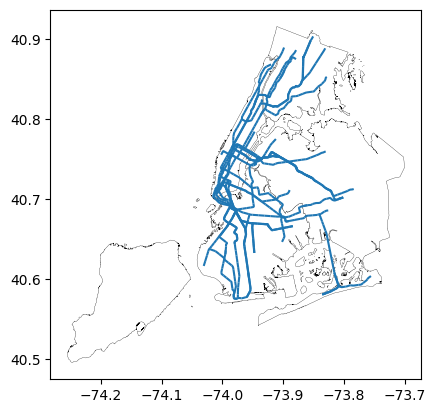

In [43]:
base = boroughs.plot(color='white', edgecolor='black', linewidth=0.2)
lines_gdf.plot(ax=base)

<AxesSubplot:>

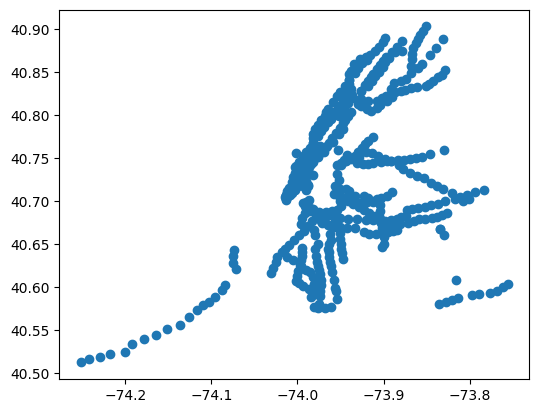

In [9]:

stations_gdf.plot()

In [33]:
# MTA NYCT Subway Elevator and Escalator Availability: Beginning 2015

MyAppToken = 'm2MgET0gzpDk2Is9e4TOVpdZ3'


query = f"""SELECT * 
            WHERE total_outages>0 AND equipment_type='Elevator'
            ORDER BY month DESC 
            LIMIT 10000"""

client = Socrata("data.ny.gov",
                 MyAppToken)
results = client.get("rc78-7x78", query=query)
results_df = pd.DataFrame.from_records(results)

In [34]:
results_df

,month,borough,equipment_type,equipment_code,total_outages,scheduled_outages,unscheduled_outages,entrapments,time_since_major_improvement,am_peak_availability,...,pm_peak_availability,pm_peak_hours_available,pm_peak_total_hours,_24_hour_availability,_24_hour_hours_available,_24_hour_total_hours,station_name,station_mrn,station_complex_name,station_complex_mrn
0,2023-12-01T00:00:00.000,Queens,Elevator,EL469,2,2,0,0,5,1.0,...,1.0,124.0,124.0,0.9949148745519714,740.2166666666667,744.0,COURTSQ-XTN-G/7,281,"Court Sq (E,G,M,7)",606
1,2023-12-01T00:00:00.000,Manhattan,Elevator,EL116,3,3,0,0,25,0.9831989247311828,...,1.0,123.99999999999999,123.99999999999999,0.9823028673835126,730.8333333333334,744.0,190ST-8AV-A,145,190 St - Station,145
2,2023-12-01T00:00:00.000,Manhattan,Elevator,EL443,7,5,2,0,84,0.9838709677419355,...,0.9810483870967742,121.64999999999999,123.99999999999999,0.975358422939068,725.6666666666666,744.0,LEXINGTONAV/63ST-63S-F/Q,223,Lexington Av/63 St - Station,223
3,2023-12-01T00:00:00.000,Manhattan,Elevator,EL217,5,2,3,2,283,0.9619623655913978,...,0.9758064516129032,120.99999999999999,123.99999999999999,0.9693772401433691,721.2166666666667,744.0,14ST-UNIONSQ-LEX-4/5/6,406,"14 St-Union Sq (L,N,Q,R,4,5,6)",602
4,2023-12-01T00:00:00.000,Bronx,Elevator,EL515,2,1,1,0,3,1.0,...,0.9836021505376344,121.96666666666665,123.99999999999999,0.9933467741935484,739.05,744.0,E149ST-PEL-6,373,E 149 St - Station,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-02-01T00:00:00.000,Manhattan,Elevator,EL278,2,2,0,0,136,1.0,...,1.0,111.99999999999999,111.99999999999999,0.9886160714285714,664.3499999999999,672.0,59ST-COLUMBUSCIRCLE-8AV-A/B/C/D,161,"59 St-Columbus Circle (A,B,C,D,1)",614
9996,2021-02-01T00:00:00.000,Brooklyn,Elevator,EL397,1,1,0,0,156,1.0,...,1.0,111.99999999999999,111.99999999999999,0.991170634920635,666.0666666666666,672.0,MYRTLE-WYCKOFFAVS-CNR-L,128,"Myrtle-Wyckoff Avs (L,M)",630
9997,2021-02-01T00:00:00.000,Manhattan,Elevator,EL713,1,1,0,0,29,1.0,...,1.0,112.0,112.0,0.9955357142857143,669.0,672.0,CORTLANDTST-7AV-1,328,Cortlandt St - Station,328
9998,2021-02-01T00:00:00.000,Brooklyn,Elevator,EL307,2,1,1,1,204,1.0,...,1.0,111.99999999999999,111.99999999999999,0.9889632936507936,664.5833333333333,672.0,ATLANTICAV-BARCLAYSCTR-BWY-B/Q,40,"Atlantic Av (B,Q,2,3,4,5)/Pacific St (D,N,R)",617


In [32]:
results_df.columns

Index(['month', 'borough', 'equipment_type', 'equipment_code', 'total_outages',
       'scheduled_outages', 'unscheduled_outages', 'entrapments',
       'time_since_major_improvement', 'am_peak_availability',
       'am_peak_hours_available', 'am_peak_total_hours',
       'pm_peak_availability', 'pm_peak_hours_available',
       'pm_peak_total_hours', '_24_hour_availability',
       '_24_hour_hours_available', '_24_hour_total_hours', 'station_name',
       'station_mrn', 'station_complex_name', 'station_complex_mrn'],
      dtype='object')